In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [11]:
# 필요한 함수들을 짜겠습니다.

def rargmax(vector):
    # 만약 다음 Q 값들이 다 같다면 random 하게 action 선택해 반환
    # 이부분 잘 모르겠는데..
    # https://gist.github.com/stober/1943451
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [2]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
           'is_slippery':False}
)

In [3]:
env = gym.make('FrozenLake-v3')

## Q Learning Algorithms

In [19]:
# Q table 을 0으로 초기화

Q = np.zeros([env.observation_space.n,env.action_space.n])

In [20]:
# 학습
num_episodes = 1000

rList = []  #reward가 제대로 학습되었는지 확인하기 위해서

In [21]:
for i in range(num_episodes):
    
    state = env.reset()
    rAll = 0
    done = False
    
    while not done :
        action = rargmax(Q[state,:])
        new_state, reward, done, _ = env.step(action)
        Q[state,action] = reward + np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
    rList.append(rAll)

In [22]:
print('Success rate : ' + str(sum(rList)/num_episodes))

Success rate : 0.88


In [23]:
print('Final Q-Table Values')
print('Left Down Right Up')
print(Q)

Final Q-Table Values
Left Down Right Up
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


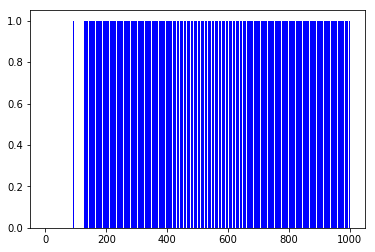

In [24]:
plt.bar(range(len(rList)),rList, color = 'blue')
plt.show()